# 🧠 Fase 1 – Entendimento do Negócio

Este projeto tem como objetivo prever o risco de doenças cardiovasculares com base em dados clínicos e hábitos de vida de pacientes.

**Objetivo:** Construir um modelo de classificação binária que indique se o paciente possui (`1`) ou não (`0`) um risco cardiovascular, com base em atributos como idade, pressão arterial, colesterol, glicose, IMC, entre outros.

**Justificativa:** Doenças cardiovasculares são a principal causa de morte no mundo. Prever o risco de forma antecipada permite ações preventivas e direcionamento de recursos em saúde.

**Variável-alvo:** `cardio`  
- 1 → presença de risco cardiovascular  
- 0 → ausência de risco

**Critério de sucesso:** Obter um modelo com **alta acurácia** e **baixo índice de falsos negativos**, priorizando a detecção precoce do risco.

**Fonte do dataset:**  
O conjunto de dados utilizado foi obtido na plataforma Kaggle:  
🔗 [Cardio Train Dataset – Kaggle: https://www.kaggle.com/datasets/pirogovskiy/cardio-train](https://www.kaggle.com/datasets/pirogovskiy/cardio-train)

O dataset contém 70.000 registros de pacientes e foi originalmente disponibilizado por Ilya Pirogovskiy com o objetivo de treinar modelos de predição baseados em características fisiológicas e hábitos de vida.


## 📋 Dicionário de Variáveis do Dataset

| Coluna         | Descrição                                                                 |
|----------------|--------------------------------------------------------------------------|
| `id`           | Identificador único do paciente                                          |
| `age`          | Idade em dias (transformaremos em anos)                                 |
| `gender`       | 1 = feminino, 2 = masculino                                              |
| `height`       | Altura em centímetros                                                    |
| `weight`       | Peso em quilogramas                                                      |
| `ap_hi`        | Pressão arterial sistólica (máxima)                                      |
| `ap_lo`        | Pressão arterial diastólica (mínima)                                     |
| `cholesterol`  | 1 = normal, 2 = acima do normal, 3 = muito acima do normal               |
| `gluc`         | Glicose (mesma codificação de colesterol)                                |
| `smoke`        | 1 = fuma, 0 = não fuma                                                   |
| `alco`         | 1 = consome álcool, 0 = não consome                                      |
| `active`       | 1 = fisicamente ativo, 0 = inativo                                       |
| `cardio`       | 1 = risco de doença cardiovascular, 0 = sem risco                        |


# 📊 Fase 2 – Entendimento dos Dados

Nesta etapa, realizamos a leitura do dataset, inspeção inicial das variáveis e estatísticas descritivas.


In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo
sns.set_theme(style='whitegrid') # adiciona um fundo branco com uma malha cinza clara (grid).
plt.rcParams['figure.figsize'] = (10, 5) # define o tamanho padrão dos gráficos: largura, altura (em polegadas).


In [2]:
# Leitura do dataset
df = pd.read_csv("cardio_train.csv", sep=';')


## 🔼 Visualização das primeiras linhas do dataset

O objetivo é verificar se o dataset foi carregado corretamente, assim, serão visualizdos os cinco primeiros registros do dataset e todas as colunas. Caso seja exibido com uma única coluna, o dataset (no caso de um arquivo .CSV) poderá exibir apenas uma única coluna. Isso ocorre, porque o delimitador padrão de colunas em um arquivo CSV é a vírgula (,) mas outros delimitadores podem ser utilizados, como o ponto-e-vírgula (;), como acontece no dataset que estamos utilizando.


In [3]:
df.head()


id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

## 🔽 Visualização das últimas linhas do dataset

O objetivo desta etapa é verificar se o dataset carregado contém linhas inválidas ou em branco ao final, o que pode ocorrer especialmente quando os dados são exportados de planilhas (como arquivos `.xlsx` ou `.csv` salvos a partir do Excel).

Esse tipo de problema é comum em ambientes corporativos ou administrativos, onde planilhas podem conter linhas vazias após os dados úteis. Utilizamos o comando `df.tail()` para exibir as **últimas 5 linhas** do dataset e verificar visualmente se há registros incompletos, espaços em branco ou duplicações acidentais.

Essa prática simples ajuda a garantir que não estamos alimentando o modelo com ruídos ou registros incorretos.


In [4]:
df.tail()


id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0

## ℹ️ Estrutura geral do dataset com `df.info()`

O comando `df.info()` é utilizado para exibir um resumo da estrutura do `DataFrame`. Ele mostra:

- O número total de registros (linhas) e o índice utilizado (`RangeIndex`)
- A quantidade de colunas e seus respectivos nomes
- A contagem de valores **não nulos** em cada coluna
- O tipo de dado (`dtype`) de cada coluna (ex: `int64`, `float64`, etc.)
- A quantidade total de memória utilizada pelo conjunto de dados

Essa análise é fundamental para:
- Verificar se há **valores ausentes** (`null` ou `NaN`)
- Confirmar os **tipos de dados esperados** para cada atributo
- Planejar possíveis transformações, como conversões de tipo, imputações ou filtragens

No caso específico deste dataset:
- Existem **13 colunas** e **70.000 registros**
- Todas as colunas possuem **100% de valores não nulos**
- A maioria dos atributos está no formato `int64`, com exceção da coluna `weight`, que é do tipo `float64` porque armazena valores com casas decimais — o que é comum em medições de peso corporal

Essa etapa garante que os dados estão íntegros e prontos para análise sem a necessidade imediata de tratamento de valores ausentes.


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## 📏 Verificação das dimensões do dataset

Utiliza-se `df.shape` para exibir o número total de registros (linhas) e de atributos (colunas) presentes no dataset. Embora essa informação também esteja no `df.info()`, aqui ela é destacada de forma objetiva.


In [6]:
print(f"Total de registros: {df.shape[0]} linhas e {df.shape[1]} colunas.")


Total de registros: 70000 linhas e 13 colunas.


## 🔠 Verificação dos tipos de dados

O comando `df.dtypes` retorna os tipos de dados de cada coluna. Embora essa informação também apareça no `df.info()`, aqui ela é isolada para facilitar a visualização e possíveis conversões futuras.


In [7]:
df.dtypes


id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

## 🚫 Verificação de valores nulos

O comando `df.isnull().sum()` verifica se há valores ausentes (nulos) em cada coluna do dataset. Essa verificação é essencial antes de aplicar qualquer modelo de aprendizado de máquina, pois algoritmos supervisionados não lidam bem com dados faltantes.

Neste caso, todas as colunas possuem 100% dos valores preenchidos.

**Se fossem encontrados dados nulos, os procedimentos mais comuns seriam:**
- **Remoção de linhas nulas:** se a quantidade for pequena e não comprometer a amostra.
- **Imputação de valores:** preenchimento com média, mediana, moda ou outra técnica estatística.
- **Criação de categoria "desconhecido":** no caso de variáveis categóricas.

Essas decisões devem ser feitas com base na importância da variável e no impacto sobre o modelo.


In [8]:
df.isnull().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 📊 Estatísticas descritivas com `df.describe()`

O comando `df.describe()` gera um resumo estatístico das colunas numéricas do dataset, oferecendo uma visão inicial sobre a distribuição dos dados. As informações apresentadas incluem:

- `count`: número de registros válidos em cada coluna (não nulos)
- `mean`: média aritmética
- `std`: desvio padrão (dispersão dos dados)
- `min`: valor mínimo
- `25%`, `50%`, `75%`: quartis (distribuição dos valores)
- `max`: valor máximo

### 🔎 Observações com base no dataset:

- A coluna `age` está em dias, com média de aproximadamente **19.468 dias (~53 anos)**, e será convertida para anos posteriormente.
- A coluna `weight` apresenta variações entre **10 kg e 200 kg**, sugerindo a necessidade de verificação de outliers.
- As colunas de pressão arterial (`ap_hi` e `ap_lo`) contêm **valores absurdos e negativos**, indicando a presença de dados inválidos (ex: `ap_hi` com mínimo -150 e máximo 16020).
- As colunas `cholesterol` e `gluc` são categóricas codificadas como `1`, `2`, `3`, onde 1 representa valores normais.
- As variáveis `smoke`, `alco` e `active` são binárias, com predominância de indivíduos não fumantes, não alcoólatras e fisicamente ativos.
- A variável-alvo `cardio` está equilibrada, com média próxima de `0.5`, indicando uma distribuição razoavelmente simétrica entre as classes `0` e `1`.

Essa análise é útil para detectar possíveis inconsistências, assimetrias e preparar os dados para a modelagem.


In [9]:
df.describe()


id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

## 📊 Distribuição da variável-alvo (`cardio`)

O gráfico gerado com `sns.countplot()` mostra a quantidade de registros para cada classe da variável-alvo `cardio`:

- `0`: pacientes **sem risco cardiovascular**
- `1`: pacientes **com risco cardiovascular**

### 🎯 Objetivo:
Analisar o **balanceamento do dataset**, ou seja, verificar se há uma distribuição equilibrada entre as classes positivas e negativas.

### ✅ Por que isso é importante?
Modelos de aprendizado supervisionado são **sensíveis ao desbalanceamento** de classes. Quando uma das classes é muito mais frequente, o modelo tende a priorizar a classe majoritária, o que pode comprometer a capacidade de prever corretamente a classe minoritária.

Neste dataset, a contagem de classes está relativamente equilibrada, o que é **positivo para o treinamento do modelo**.

> 🔍 Essa verificação visual é um passo essencial antes de partir para a modelagem.


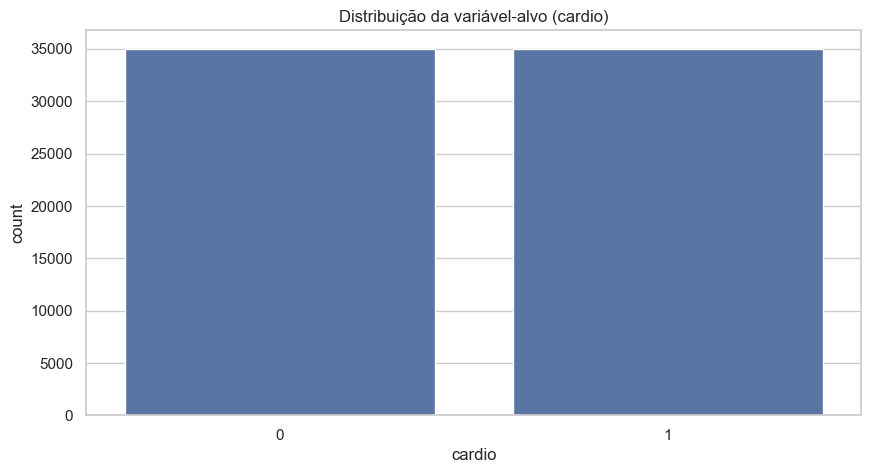

In [10]:
sns.countplot(data=df, x='cardio')
plt.title('Distribuição da variável-alvo (cardio)')
plt.show()


## 📆 Conversão da idade de dias para anos

Para facilitar a interpretação visual, criamos a coluna `age_years`, convertendo a idade original (em dias) para anos completos. Essa conversão é útil para as análises gráficas e será utilizada também como preditor no modelo final.


In [11]:
df["age_years"] = (df["age"] / 365).astype(int)


## 📈 Distribuição da idade por presença de risco cardiovascular

Este gráfico foi construído com `sns.histplot()`, utilizando a variável `age_years` (idade em anos), separada por cor (`hue`) de acordo com a variável-alvo `cardio`:

- `cardio = 0`: pacientes **sem risco cardiovascular**
- `cardio = 1`: pacientes **com risco cardiovascular**

Além da contagem de observações por faixa etária (`bins=30`), foi incluída a **curva de densidade (`kde=True`)**, que permite observar a tendência de distribuição ao longo da idade.

---

### 🎯 Objetivo do gráfico:
Analisar se há uma **relação entre a idade** e a **presença de risco cardiovascular**, verificando diferenças visuais entre as distribuições das classes 0 e 1.

---

### 📌 Interpretação do gráfico:

- Pacientes **com risco (`cardio = 1`)** tendem a se concentrar nas **faixas etárias mais elevadas**, com maior densidade entre **55 e 62 anos**.
- Já os **sem risco (`cardio = 0`)** estão mais concentrados em faixas ligeiramente mais baixas, com picos entre **45 e 55 anos**.
- Essa diferença indica uma **tendência crescente de risco com o avanço da idade**, o que faz sentido do ponto de vista clínico.

---

### ✅ Por que esse gráfico é importante na Fase 2 (CRISP-DM)?

- Permite **visualizar padrões potenciais** entre variáveis explicativas e o alvo
- Reforça a **relevância da idade como variável preditora**
- Ajuda a detectar **sobreposições entre as classes**, o que influencia a complexidade da modelagem


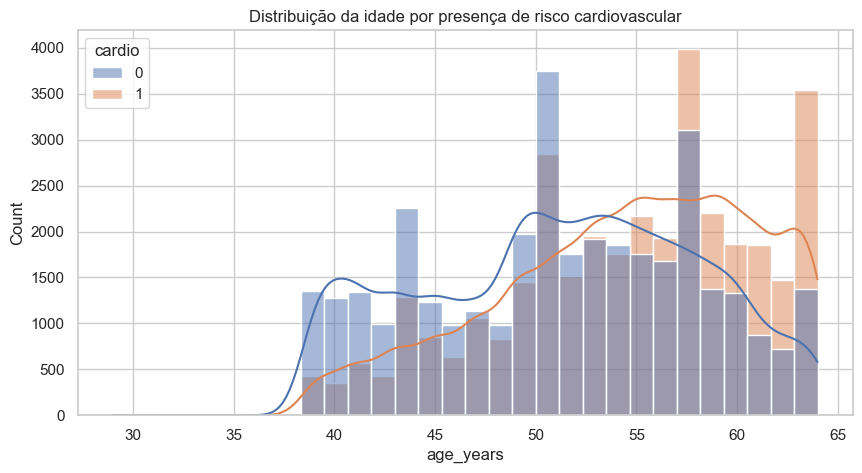

In [12]:
sns.histplot(data=df, x='age_years', hue='cardio', kde=True, bins=30)
plt.title('Distribuição da idade por presença de risco cardiovascular')
plt.show()


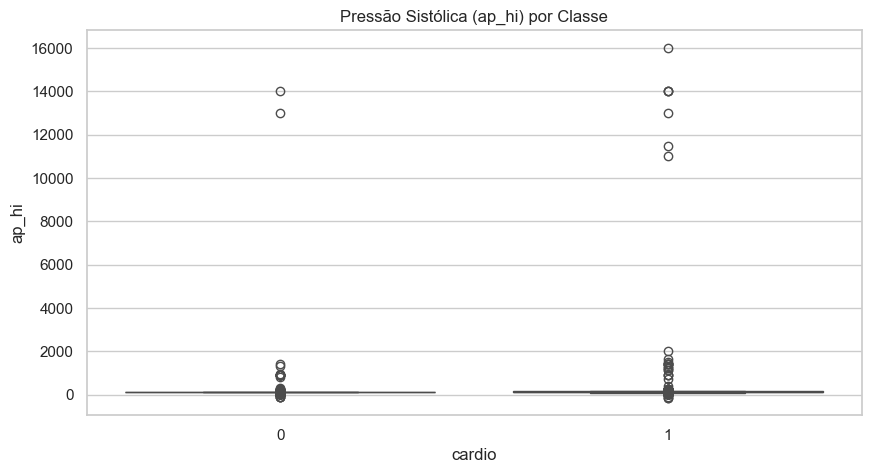

In [13]:
# Boxplot da pressão sistólica por classe
sns.boxplot(data=df, x='cardio', y='ap_hi')
plt.title('Pressão Sistólica (ap_hi) por Classe')
plt.show()

## 🧪 Análise inicial da Pressão Sistólica (`ap_hi`)

O gráfico acima mostra valores extremamente altos para a pressão sistólica, com registros ultrapassando 16.000 mmHg — um valor clinicamente impossível. Esses valores distorcem a escala do gráfico e comprometem a análise da variável.

Para uma avaliação mais precisa, vamos remover os valores incoerentes:
- Pressão sistólica (`ap_hi`) **menor que 50** mmHg
- Pressão sistólica **maior que 250** mmHg


In [14]:
# Filtrar registros com pressão sistólica inválida
df = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 250)]
print(f"Total de registros após limpeza: {df.shape[0]}")


Total de registros após limpeza: 69772


### 📦 Boxplot da Pressão Sistólica (`ap_hi`) após limpeza

O gráfico abaixo reflete a distribuição da variável `ap_hi` após a **remoção dos outliers**. Com isso, conseguimos visualizar melhor os dados reais e comparar as classes com maior precisão.

#### ✅ O que observamos:
- A distribuição agora está mais **condensada e realista**, com valores majoritariamente entre **90 e 180 mmHg** — faixas clinicamente plausíveis.
- A **classe 1** (com risco cardiovascular) apresenta uma **mediana de pressão sistólica superior** à classe 0, indicando uma possível associação entre hipertensão e presença de risco.
- Ainda há alguns outliers residuais, o que é esperado em dados de saúde, mas **sem distorções graves** como antes da limpeza.

#### 📌 Importância da análise:
- A variável `ap_hi` mostra potencial como **atributo relevante** na modelagem preditiva.
- A visualização ajustada facilita a **comparação entre as classes** e auxilia na compreensão do comportamento da pressão sistólica em pacientes com e sem risco cardiovascular.
- Esta etapa reforça o compromisso com a **qualidade dos dados**, essencial para a construção de modelos robustos e confiáveis.

> 💡 A remoção de valores extremos foi uma etapa necessária para evitar que registros incorretos ou fora da escala médica aceitável interferissem nas análises e no desempenho dos algoritmos de classificação.


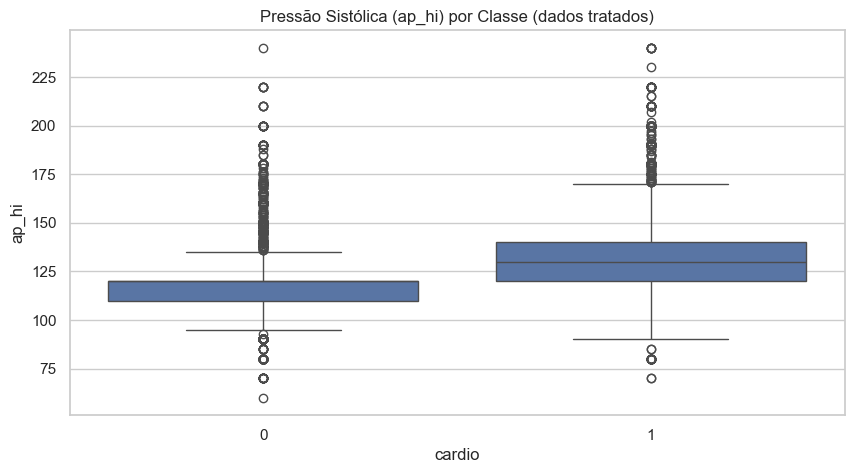

In [15]:
sns.boxplot(data=df, x='cardio', y='ap_hi')
plt.title('Pressão Sistólica (ap_hi) por Classe (dados tratados)')
plt.show()


### 🔥 Heatmap de Correlação entre Variáveis Numéricas

O **heatmap** (ou mapa de calor) é uma representação gráfica que utiliza cores para mostrar a **força e a direção da correlação** entre variáveis numéricas. As correlações variam de:

- **+1.0** (correlação positiva perfeita)
- **0** (nenhuma correlação)
- **-1.0** (correlação negativa perfeita)

#### 🎯 Objetivo do gráfico:
Este gráfico ajuda a identificar quais variáveis têm **maior influência entre si**, o que é crucial para entender a estrutura dos dados e tomar decisões sobre seleção de atributos para os modelos de Machine Learning.

---

### 📌 Análise do heatmap apresentado:

- A variável-alvo **`cardio`** tem correlação mais significativa com:
  - **`age` / `age_years`**: 0.24 — indicando que a idade tem influência moderada sobre o risco cardiovascular.
  - **`ap_hi` (pressão sistólica)**: 0.11
  - **`cholesterol`**: 0.22
  - **`gluc` (glicose)**: 0.1
  - **`smoke`** e **`alco`** também mostram correlações leves (~0.03–0.04), mas ainda relevantes do ponto de vista de saúde pública.

> ⚠️ Apesar de não haver correlações extremamente altas, isso é comum em datasets clínicos, onde múltiplos fatores atuam **conjuntamente** sobre o risco de doenças — e não de forma isolada.

---

### 💡 Por que o heatmap é importante?

- Auxilia na **escolha de variáveis relevantes** para o modelo.
- Pode revelar **multicolinearidade** (variáveis muito correlacionadas entre si), o que pode ser problemático em alguns algoritmos.
- Permite uma **análise exploratória visual** rápida e eficaz, facilitando a tomada de decisões na próxima etapa do CRISP-DM (Preparação dos Dados).

---

### ✅ Conclusão

O heatmap mostra que variáveis como **idade**, **colesterol**, **pressão arterial** e **nível de glicose** têm um papel importante na predição do risco cardiovascular. Esses insights serão levados em conta na **seleção de atributos** para a construção do modelo preditivo.

> 📊 Etapas como essa fortalecem a compreensão dos dados e aumentam a **eficácia da modelagem supervisionada**.


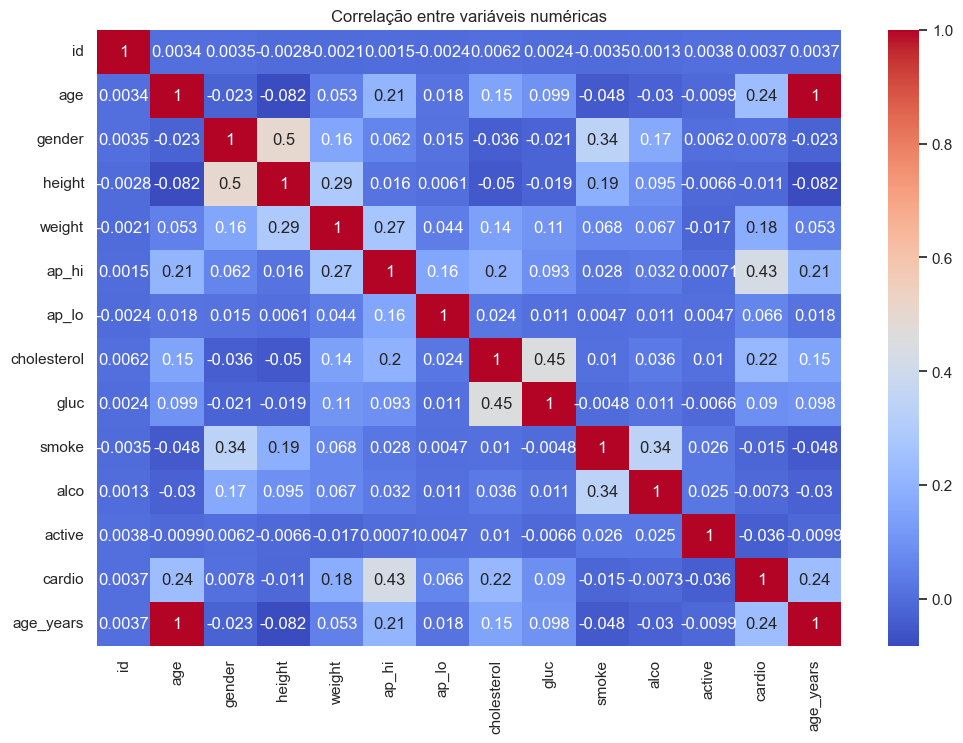

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis numéricas')
plt.show()


### ⚠️ Verificação de Valores Inconsistentes

Antes de aplicar qualquer modelo de Machine Learning, é essencial garantir que os dados estejam coerentes e sem anomalias que possam comprometer a análise. Nesta célula, realizamos uma **verificação de valores inconsistentes**, filtrando os registros que apresentam características fora dos limites fisiológicos aceitáveis.

As condições utilizadas para identificar inconsistências foram:

- `ap_hi < ap_lo`: pressão sistólica menor que a diastólica — o que não é fisiologicamente possível.
- `height < 100` ou `height > 250`: altura fora da faixa considerada realista para adultos.
- `weight < 30` ou `weight > 200`: peso fora dos padrões humanos típicos.

```python
df[(df['ap_hi'] < df['ap_lo']) | 
   (df['height'] < 100) | (df['height'] > 250) | 
   (df['weight'] < 30) | (df['weight'] > 200)]
```

📌 Objetivo:
O objetivo desta análise é identificar e posteriormente remover registros que possam representar erros de digitação, medições incorretas ou dados irreais, que poderiam influenciar negativamente a performance dos algoritmos de classificação.

✅ Foram encontrados 1084 registros inconsistentes, que serão removidos na etapa de limpeza para garantir a integridade do conjunto de dados.

Essa etapa faz parte da Fase 2 – Entendimento dos Dados (CRISP-DM), que tem como foco conhecer profundamente o dataset, identificar problemas e preparar o caminho para uma modelagem eficaz.


In [17]:
# Verificando valores inconsistentes
df[(df['ap_hi'] < df['ap_lo']) | (df['height'] < 100) | (df['height'] > 250) | (df['weight'] < 30) | (df['weight'] > 200)]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
224      309  21800       2      76    55.0    120     80            1     1   
228      314  17489       2     183    98.0    160   1100            1     2   
241      334  21932       2     157    60.0    160   1000            2     1   
260      357  18217       1     150    83.0    140    800            1     1   
329      458  23407       1     176    63.0    160   1000            2     2   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69771  99659  23330       1     167    81.0    160   1000            1     1   
69872  99798  21808       1     152    56.0    160   1000            1     1   
69878  99807  21239       2     168    95.0    160   1000            1     1   
69885  99816  22417       2     166    78.0    170   1000            1     1   
69967  99955  21416       2     168    63.0    140   1000            1     1   

       smoke  alco  active  cardio  age_years  
224        0     0       1       0         59  
228        1     0       1       1         47  
241        0     0       0       1         60  
260        0     0       1       1         49  
329        0     0       0       1         64  
...      ...   ...     ...     ...        ...  
69771      0     0       1       1         63  
69872      0     0       1       1         59  
69878      0     0       1       1         58  
69885      0     0       0       0         61  
69967      0     0       1       1         58  

[1084 rows x 14 columns]

### 🧹 Remoção de Registros com Valores Inconsistentes

Após identificar registros com **valores fora dos limites fisiológicos plausíveis**, realizamos a remoção desses dados a fim de garantir a **qualidade e confiabilidade das análises e modelagens futuras**.

#### 🔎 Critérios utilizados para a filtragem:

- **Pressão sistólica (`ap_hi`) deve ser maior ou igual à pressão diastólica (`ap_lo`)**  
  → Valores invertidos sugerem erro de digitação ou coleta.

- **Altura (`height`) deve estar entre 100 cm e 250 cm**  
  → Abaixo disso, provavelmente trata-se de erro na unidade ou digitação.

- **Peso (`weight`) deve estar entre 30 kg e 200 kg**  
  → Pesos extremos são pouco realistas para adultos.

#### ✅ Por que isso é importante?

Remover registros inconsistentes é uma **etapa fundamental da Fase 2 do CRISP-DM (Entendimento dos Dados)**. Dados inválidos podem comprometer:

- As **análises estatísticas** e visuais.
- A **eficácia dos modelos de machine learning** (por gerar vieses ou outliers irreais).
- A **confiabilidade dos insights extraídos**.

Com a limpeza aplicada, o dataset ficou mais coeso e representativo da população real.

> 🔄 Essa etapa é essencial antes de seguirmos com a análise exploratória, normalização e divisão do conjunto de dados para treino/teste.


In [18]:
# Remoção de registros com valores inconsistentes
df = df[ (df['ap_hi'] >= df['ap_lo']) &
         (df['height'] >= 100) & (df['height'] <= 250) &
         (df['weight'] >= 30) & (df['weight'] <= 200)
       ]

# Verificando a nova forma do dataset
print("Total de registros após limpeza:", df.shape[0])


Total de registros após limpeza: 68688


# 🔧 Fase 3 – Preparação dos Dados

Nesta fase, realizamos a preparação do conjunto de dados para a etapa de modelagem. Isso inclui:

- Criação de novas variáveis relevantes (engenharia de atributos)
- Remoção de colunas irrelevantes ou identificadores
- Seleção das variáveis preditoras (X) e do alvo (y)
- Divisão dos dados em conjuntos de treino, validação e teste


## 📐 Cálculo do IMC (Índice de Massa Corporal)

O IMC é uma variável importante para avaliação de risco cardiovascular, pois considera a relação entre o peso e a altura do paciente.

A fórmula utilizada é:

$$
\text{IMC} = \frac{\text{peso (kg)}}{\left(\frac{\text{altura (cm)}}{100}\right)^2}
$$


In [19]:
# Cálculo do IMC
df["imc"] = df["weight"] / ((df["height"] / 100) ** 2)
df[["weight", "height", "imc"]].head()

weight  height        imc
0    62.0     168  21.967120
1    85.0     156  34.927679
2    64.0     165  23.507805
3    82.0     169  28.710479
4    56.0     156  23.011177

## 🧹 Seleção de colunas preditoras e alvo

Removemos o identificador `id` e a coluna original `age` (em dias), mantendo `age_years` e o novo atributo `imc`.


In [20]:
# Remoção de colunas irrelevantes
df.drop(columns=["id"], inplace=True)

# Separação entre atributos e variável-alvo
X = df.drop("cardio", axis=1)
y = df["cardio"]

## ✂️ Divisão dos dados em treino, validação e teste

Dividimos o conjunto de dados em:
- 70% treino
- 15% validação
- 15% teste

Esse procedimento segue a recomendação do professor e garante que o modelo seja avaliado de forma confiável.


In [27]:
from sklearn.model_selection import train_test_split

# 1. Separando 15% para teste
x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

# 2. Agora, dos 85% restantes, vamos separar 15% para validação:
val_size = 0.15 / 0.85  # proporcional à parte restante
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=val_size, stratify=y_temp, random_state=42)

# Verificando os tamanhos
print(f"Tamanho treino: {x_train.shape}")
print(f"Tamanho validação: {x_val.shape}")
print(f"Tamanho teste: {x_test.shape}")

Tamanho treino: (48080, 13)
Tamanho validação: (10304, 13)
Tamanho teste: (10304, 13)


# 🤖 Fase 4 – Modelagem dos Algoritmos

Aqui treinamos e avaliamos vários modelos de classificação supervisionada.


In [ ]:
# Importação dos modelos
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm

# Treinamento dos modelos
modelos = [
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(solver='saga', max_iter=2000),
    GaussianNB(), 
    svm.SVC(), 
    GradientBoostingClassifier(n_estimators=100), 
    MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), max_iter=1000) 
]

modelos_treinados = []
for modelo in modelos:
    try:
        modelo.fit(x_train, y_train)
        modelos_treinados.append(modelo)
    except Exception as e:
        print(f"Erro ao treinar {type(modelo).__name__}: {e}")

c:\Users\renan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# 📈 Fase 5 – Avaliação

Avaliação dos modelos com base na acurácia e matriz de confusão.


In [29]:
from sklearn.metrics import accuracy_score

acuracias = []

for modelo in modelos_treinados:
    try:
        y_pred = modelo.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        acuracias.append((type(modelo).__name__, acc))
    except Exception as e:
        print(f"Erro ao avaliar {type(modelo).__name__}: {e}")


# 🚀 Fase 6 – Implantação

Persistência do melhor modelo usando `pickle` para uso futuro.


In [24]:
# Escolher melhor modelo com base na acurácia
melhor_modelo = sorted(acuracias, key=lambda x: x[1], reverse=True)[0][0]
print(f"Melhor modelo: {melhor_modelo}")

# Salvar modelo
import pickle

modelo_final = [m for m in modelos_treinados if type(m).__name__ == melhor_modelo][0]

with open("modelo_cardio.pickle", "wb") as file:
    pickle.dump(modelo_final, file)


Melhor modelo: GradientBoostingClassifier


In [25]:
# Nova separação: treino (70%), validação (15%), teste (15%)
x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)  # 0.1765 ≈ 15% do total

print(f"Treino: {len(x_train)} | Validação: {len(x_val)} | Teste: {len(x_test)}")

Treino: 48079 | Validação: 10305 | Teste: 10304


In [26]:
from sklearn.metrics import classification_report

# Relatório completo do melhor modelo
modelo = modelos_treinados[0]
y_pred = modelo.predict(x_test)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      5206
           1       0.71      0.70      0.70      5098

    accuracy                           0.71     10304
   macro avg       0.71      0.71      0.71     10304
weighted avg       0.71      0.71      0.71     10304

